# Tube retraction characteristics charts
The purpose of these graphs is to analyze and compare the efficiency of different tube types in terms of their shortening behavior under pressure. Specifically to identify which combination of tube length, pressure, and outer diameter produces the largest percentage shortening while using the lowest possible pressure. The data will be used to determine the optimal tube length for exoskeleton control via pressurized muscles (tubes).

In [237]:
import pandas as pd

# length in inch; color and type; length on 30psi in inches; length on 60psi  in inches; outer diameter in inches; sleeve diameter in inches
data = [
    # --- 3/4 inch sleeve ---
    [30, "yellow latex", 24.25, 21.5, 0.375, 0.75],
    [30, "black latex", 24.0, 21.5, 0.25, 0.75],

    [24, "yellow latex", 20.0, 17.25, 0.375, 0.75],
    [24, "black latex", 20.0, 17.0, 0.25, 0.75],

    [18, "yellow latex", 14.75, 13.0, 0.375, 0.75],
    [18, "black latex", 14.5, 12.5, 0.25, 0.75],

    [12, "yellow latex", 10.0, 8.5, 0.375, 0.75],
    [12, "black latex", 9.5, 8.25, 0.25, 0.75],
    
    [9, "yellow latex", 7.5, 6.5, 0.375, 0.75],
    [9, "black latex", 6.5, 5.5, 0.25, 0.75],

    [6, "yellow latex", 5, 4, 0.375, 0.75],
    [6, "black latex", 5, 4, 0.25, 0.75],

    # --- 1 inch sleeve ---
    #[24, "yellow latex"], Turtuous
    #[24, "black latex"], Turtuous

    #[18, "yellow latex"], Turtuous
    #[18, "black latex"], Turtuous

    #[12, "yellow latex"], Turtuous
    #[12, "black latex"], Turtuous
    
    #[9, "yellow latex"], Turtuous
    #[9, "yellow latex", 9, 9, 0.25, 1], # not a real measurement, just to make chart work
    [9, "black latex", 6.5, 5.75, 0.25, 1],
]

df = pd.DataFrame(data, columns=["length_nominal", "material", "length_30psi", "length_60psi", "outer_diameter", "sleeve_diameter"])

# shrink percentage
df["shrink_30psi"] = (df["length_nominal"] - df["length_30psi"]) / df["length_nominal"] * 100
df["shrink_60psi"] = (df["length_nominal"] - df["length_60psi"]) / df["length_nominal"] * 100

color_pallete =[
    "#bcbc00",
    "#000000",
]

single_value_color_pallete = ["#000000", "#000000"]

# Percentage reduction based on length and material (outer diameter)
We can see that shorter the tube is, better contraction we get, also smaller outer diameter in black latex tube could also cause that it has higher shortening percentage.

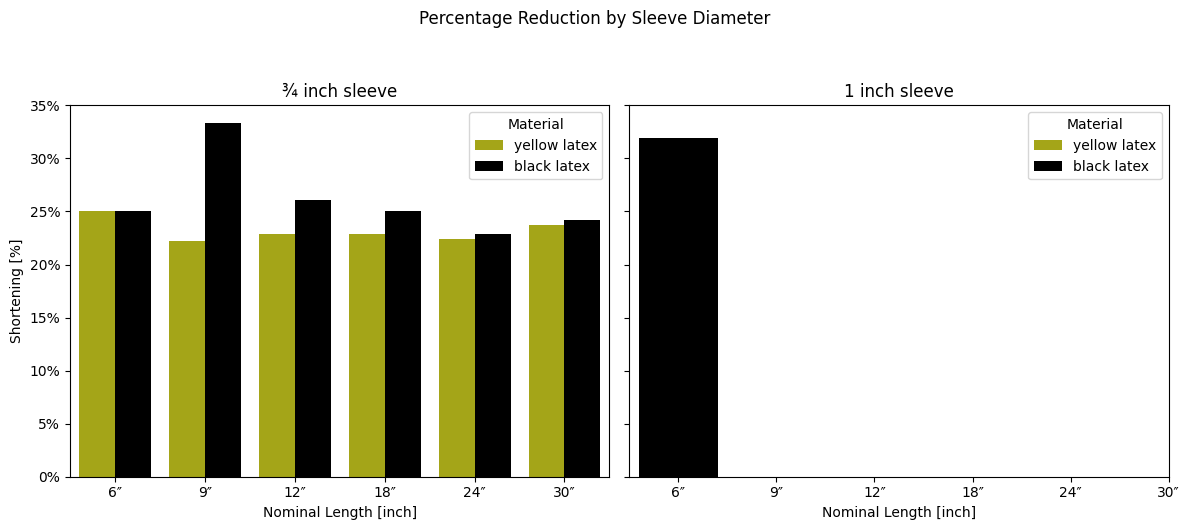

In [238]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Melt the dataframe ---
df_melt = df.melt(
    id_vars=["length_nominal", "material", "outer_diameter", "sleeve_diameter"],
    value_vars=["shrink_30psi", "shrink_60psi"],
    var_name="pressure",
    value_name="shrink_percent"
)

# --- Create figure with subplots ---
sleeve_values = sorted(df_melt["sleeve_diameter"].unique())
fig, axes = plt.subplots(1, len(sleeve_values), figsize=(12,5), sharey=True)

# --- Determine x-tick labels based on first sleeve ---
x_labels = sorted(df_melt[df_melt["sleeve_diameter"] == sleeve_values[0]]["length_nominal"].unique())

# --- Plot each sleeve ---
palettes = {0.75: color_pallete, 1.0: color_pallete}  # 1" sleeve palette now has 2 colors
title_map = {0.75: "¾ inch sleeve", 1.0: "1 inch sleeve"}

# Ensure consistent hue order
hue_order = df_melt["material"].unique()

for ax, sleeve in zip(axes, sleeve_values):
    subset = df_melt[df_melt["sleeve_diameter"] == sleeve]
    
    # Barplot
    sns.barplot(
        data=subset,
        x="length_nominal",
        y="shrink_percent",
        hue="material",
        hue_order=hue_order,       # ensures correct color mapping
        palette=palettes[sleeve],
        errorbar=None,
        ax=ax
    )

    # Fix x-ticks: match first sleeve
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels([f"{int(x)}″" if x.is_integer() else f"{x:.2f}″" for x in x_labels])
    
    # Titles and labels
    ax.set_title(title_map[sleeve])
    ax.set_xlabel("Nominal Length [inch]")
    ax.set_ylabel("Shortening [%]")
    
    # Format y-axis as percentages
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.0f}%"))
    
    # Legend inside each subplot
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels, title="Material", loc='upper right')

plt.suptitle("Percentage Reduction by Sleeve Diameter", y=1.05)
plt.tight_layout()
plt.show()

# Effect of Outer Diameter on Tube Shortening
Based on the measured data, it appears that the smaller the outer diameter, the higher the shortening percentage.

/var/folders/2k/csbjv6zx6rq0zm5hmc4zj_sw0000gn/T/ipykernel_15754/3610376665.py:27: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



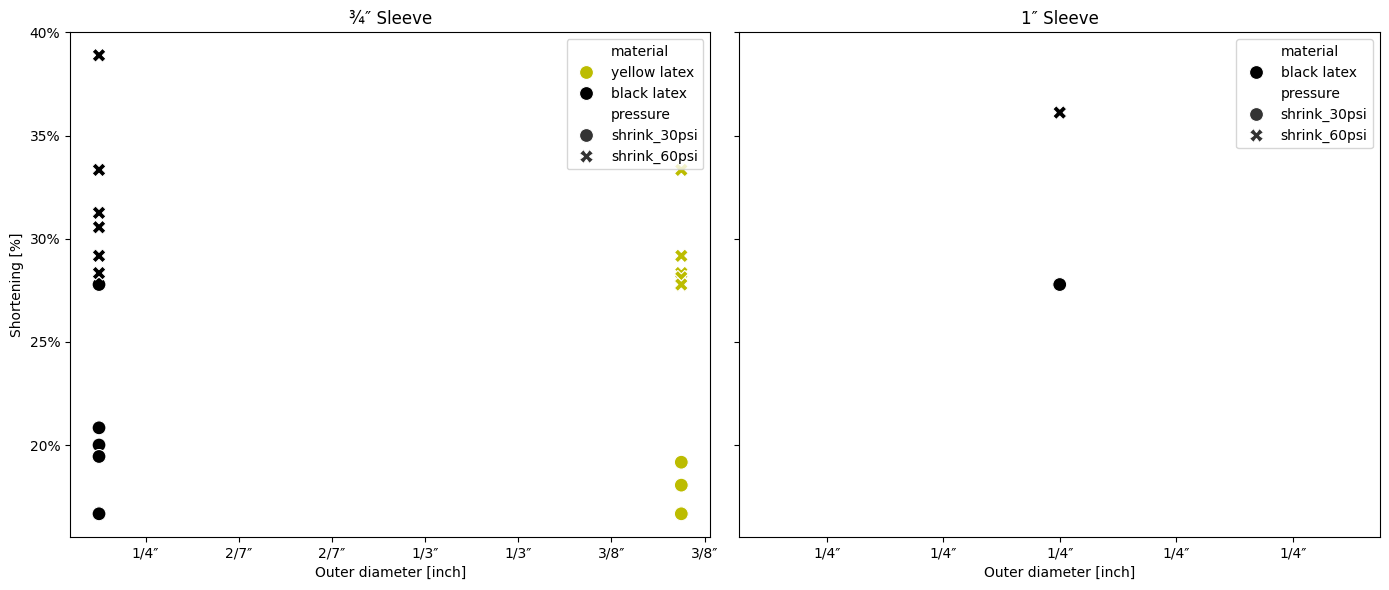

In [239]:
from fractions import Fraction
import matplotlib.ticker as mtick

# Split data by sleeve diameter
df_34 = df_melt[df_melt["sleeve_diameter"] == 0.75]
df_1 = df_melt[df_melt["sleeve_diameter"] == 1.0]

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- 3/4 inch sleeves ---
sns.scatterplot(
    data=df_34,
    x="outer_diameter",
    y="shrink_percent",
    hue="material",
    style="pressure",
    s=100,
    palette=color_pallete,
    ax=axes[0]
)
axes[0].set_title("¾″ Sleeve")
axes[0].set_xlabel("Outer diameter [inch]")
axes[0].set_ylabel("Shortening [%]")

# --- 1 inch sleeves ---
sns.scatterplot(
    data=df_1,
    x="outer_diameter",
    y="shrink_percent",
    hue="material",
    style="pressure",
    s=100,
    palette=single_value_color_pallete,
    ax=axes[1]
)
axes[1].set_title("1″ Sleeve")
axes[1].set_xlabel("Outer diameter [inch]")
axes[1].set_ylabel("")  # shared y-axis

# --- Format x-axis to show fractional inches (1/8, 2/8, …) ---
def frac_formatter(x, pos):
    frac = Fraction(x).limit_denominator(8)
    if frac.denominator == 1:
        return f"{frac.numerator}″"
    else:
        return f"{frac.numerator}/{frac.denominator}″"

for ax in axes:
    ax.xaxis.set_major_formatter(mtick.FuncFormatter(frac_formatter))
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{y:.0f}%"))

plt.tight_layout()
plt.show()


# Tube Shortening as a Function of Tube Length
From the measured data, we can see that the shorter the tube, the higher the shortening percentage.

/var/folders/2k/csbjv6zx6rq0zm5hmc4zj_sw0000gn/T/ipykernel_15754/758888675.py:46: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



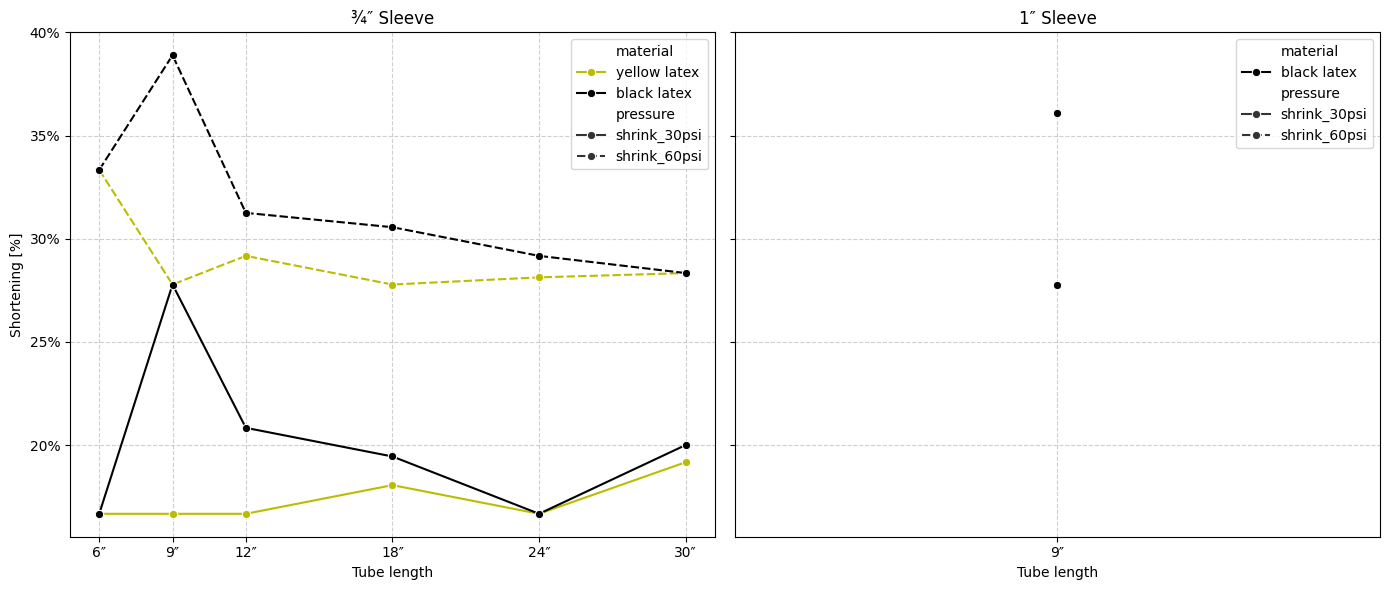

In [240]:
# --- Line chart: Shortening percentage vs tube length ---
from fractions import Fraction
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

# Split data by sleeve diameter
df_34 = df_melt[df_melt["sleeve_diameter"] == 0.75]
df_1 = df_melt[df_melt["sleeve_diameter"] == 1.0]

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Formatter for fractional inches ---
def frac_formatter(x, pos):
    frac = Fraction(x).limit_denominator(8)
    if frac.denominator == 1:
        return f"{frac.numerator}″"
    else:
        return f"{frac.numerator}/{frac.denominator}″"

# --- Get unique x-ticks from data ---
x_ticks_34 = sorted(df_34["length_nominal"].unique())
x_ticks_1 = sorted(df_1["length_nominal"].unique())

# --- 3/4 inch sleeves ---
sns.lineplot(
    data=df_34,
    x="length_nominal",
    y="shrink_percent",
    hue="material",
    style="pressure",
    marker="o",
    palette=color_pallete,
    ax=axes[0]
)
axes[0].set_xticks(x_ticks_34)                     # force x-ticks to match data
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(frac_formatter))
axes[0].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{y:.0f}%"))
axes[0].set_title("¾″ Sleeve")
axes[0].set_xlabel("Tube length")
axes[0].set_ylabel("Shortening [%]")
axes[0].grid(True, linestyle="--", alpha=0.6)

# --- 1 inch sleeves ---
sns.lineplot(
    data=df_1,
    x="length_nominal",
    y="shrink_percent",
    hue="material",
    style="pressure",
    marker="o",
    palette=single_value_color_pallete,
    ax=axes[1]
)
axes[1].set_xticks(x_ticks_1)                     # force x-ticks to match data
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(frac_formatter))
axes[1].yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: f"{y:.0f}%"))
axes[1].set_title("1″ Sleeve")
axes[1].set_xlabel("Tube length")
axes[1].set_ylabel("")  # shared y-axis
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

# Effect of Tube Length and Diameter on Shortening Percentage
Each colored line connects points of the same material and pressure, showing how shortening changes with outer diameter and tube length. Gray lines connect tubes with the same length and pressure to highlight the effect of diameter and material on shortening.

From the plot, we can observe that shorter tubes generally achieve higher shortening percentages, and tubes with smaller outer diameters tend to contract more.

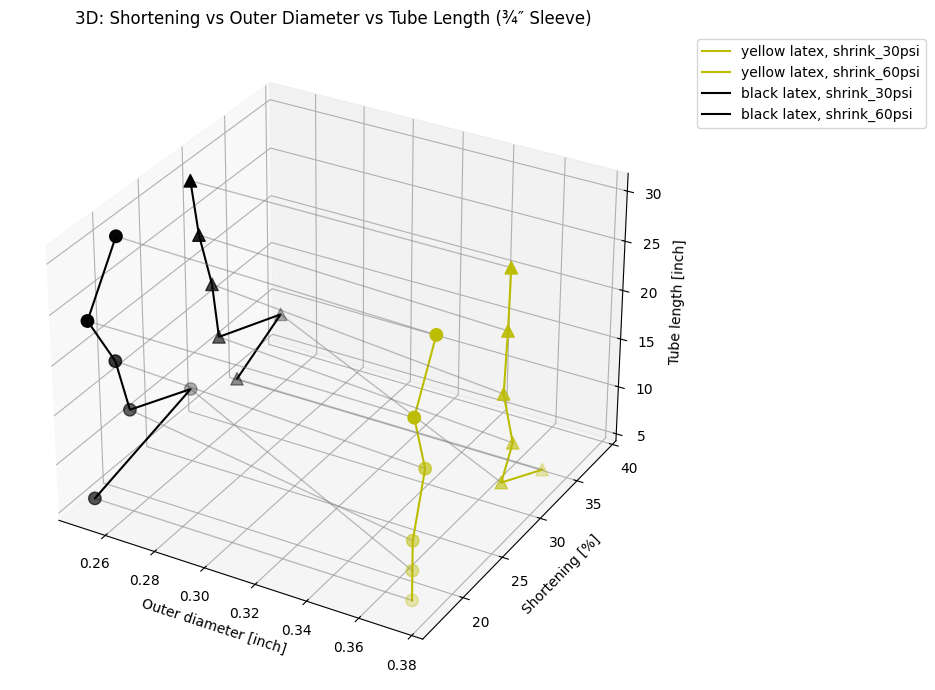

In [241]:
import matplotlib.pyplot as plt
import itertools

# --- Filter out 1 inch sleeve ---
df_34 = df_melt[df_melt["sleeve_diameter"] == 0.75]

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')

markers = {"shrink_30psi": "o", "shrink_60psi": "^"}

materials = df_34["material"].unique()
pressures = df_34["pressure"].unique()

base_colors = dict(zip(materials, itertools.cycle(color_pallete)))

for mat in materials:
    for pres in pressures:
        subset = df_34[(df_34["material"] == mat) & (df_34["pressure"] == pres)]
        subset = subset.sort_values("length_nominal")
        ax.plot(
            subset["outer_diameter"],
            subset["shrink_percent"],
            subset["length_nominal"],
            label=f"{mat}, {pres}",
            color=base_colors[mat]
        )
        ax.scatter(
            subset["outer_diameter"],
            subset["shrink_percent"],
            subset["length_nominal"],
            s=80,
            marker=markers.get(pres, "o"),
            color=base_colors[mat]
        )

# Optional: connect same-length points across outer_diameter
for length in df_34["length_nominal"].unique():
    for pres in pressures:
        subset = df_34[(df_34["length_nominal"] == length) & (df_34["pressure"] == pres)]
        if len(subset) > 1:
            ax.plot(
                subset["outer_diameter"],
                subset["shrink_percent"],
                subset["length_nominal"],
                color="gray", alpha=0.5, linewidth=1
            )

ax.set_title("3D: Shortening vs Outer Diameter vs Tube Length (¾″ Sleeve)")
ax.set_xlabel("Outer diameter [inch]")
ax.set_ylabel("Shortening [%]")
ax.set_zlabel("Tube length [inch]")

ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [242]:
import plotly.graph_objects as go

# --- Filter out 1 inch sleeve ---
df_34 = df_melt[df_melt["sleeve_diameter"] == 0.75]

fig = go.Figure()

markers = {"30 psi": "circle", "60 psi": "triangle-up"}

materials = df_34["material"].unique()
color_map = dict(zip(materials, color_pallete))

# Add traces for each material and pressure
for mat in materials:
    for pres in df_34["pressure"].unique():
        subset = df_34[(df_34["material"] == mat) & (df_34["pressure"] == pres)]
        subset = subset.sort_values("length_nominal")
        
        fig.add_trace(go.Scatter3d(
            x=subset["outer_diameter"],
            y=subset["shrink_percent"],
            z=subset["length_nominal"],
            mode="lines+markers",
            name=f"{mat}, {pres}",
            marker=dict(
                symbol=markers.get(pres, "circle"),
                size=5,
                color=color_map[mat]   # ← custom color
            ),
            line=dict(width=3, color=color_map[mat])  # ← line color
        ))

# Layout
fig.update_layout(
    scene=dict(
        xaxis_title="Outer diameter [inch]",
        yaxis_title="Shortening [%]",
        zaxis_title="Tube length [inch]"
    ),
    title="Interactive 3D: Shortening vs Outer Diameter vs Tube Length (¾″ Sleeve)"
)

fig.show()

# Tube Efficiency: Shortening per PSI vs Tube Length
This line plot shows the efficiency of tubes, defined as the percentage of shortening per unit of applied pressure (shortening % per PSI), for different tube lengths, materials, and pressure levels. Each line represents a specific material under a given pressure, illustrating how efficiency changes with tube length. From the graph, we can observe that shorter tubes generally achieve higher efficiency, and the outer diameter and material influence the efficiency at both pressure levels.

/var/folders/2k/csbjv6zx6rq0zm5hmc4zj_sw0000gn/T/ipykernel_15754/3836646681.py:58: UserWarning:

The palette list has more values (2) than needed (1), which may not be intended.



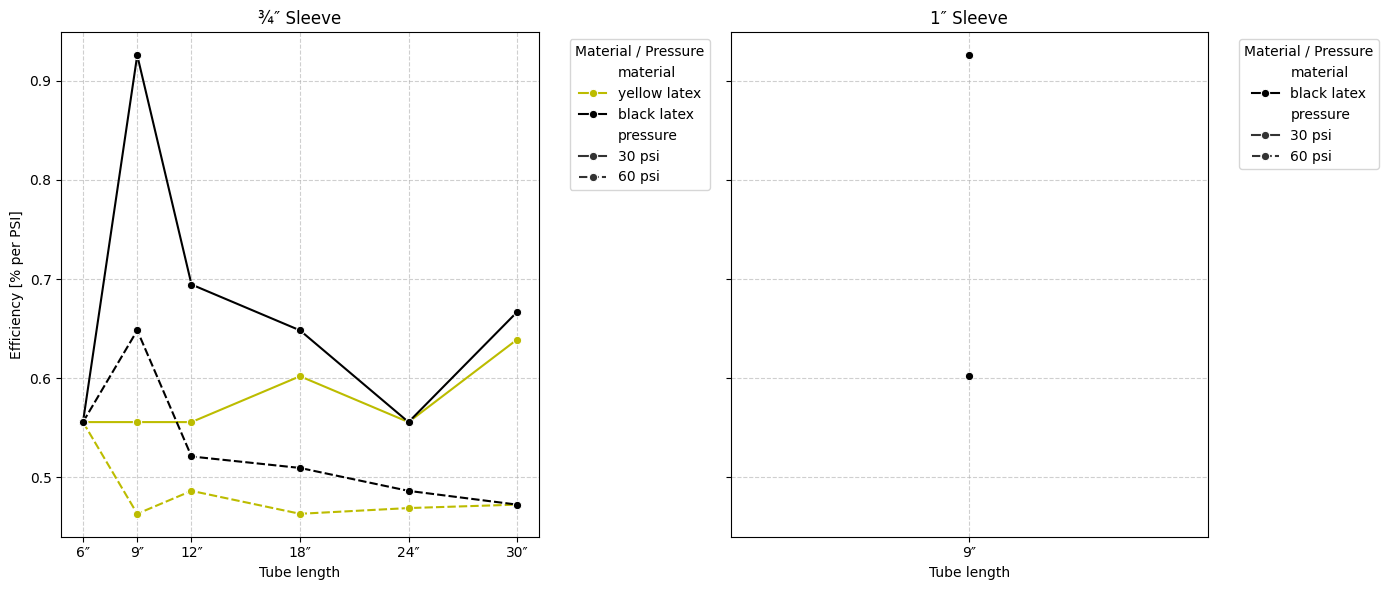

In [243]:
# --- Efficiency = shortening per psi ---
df["efficiency_30psi"] = df["shrink_30psi"] / 30
df["efficiency_60psi"] = df["shrink_60psi"] / 60

df_eff = df.melt(
    id_vars=["length_nominal", "material", "outer_diameter", "sleeve_diameter"],
    value_vars=["efficiency_30psi", "efficiency_60psi"],
    var_name="pressure",
    value_name="efficiency"
)

df_eff["pressure"] = df_eff["pressure"].replace({
    "efficiency_30psi": "30 psi",
    "efficiency_60psi": "60 psi"
})

# Split data by sleeve diameter
df_eff_34 = df_eff[df_eff["sleeve_diameter"] == 0.75]
df_eff_1 = df_eff[df_eff["sleeve_diameter"] == 1.0]

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Formatter for fractional inches ---
from fractions import Fraction
import matplotlib.ticker as mtick
def frac_formatter(x, pos):
    frac = Fraction(x).limit_denominator(8)
    if frac.denominator == 1:
        return f"{frac.numerator}″"
    else:
        return f"{frac.numerator}/{frac.denominator}″"

# --- Get x-ticks
x_ticks_34 = sorted(df_eff_34["length_nominal"].unique())
x_ticks_1 = sorted(df_eff_1["length_nominal"].unique())

# --- 3/4 inch sleeves ---
sns.lineplot(
    data=df_eff_34,
    x="length_nominal",
    y="efficiency",
    hue="material",
    style="pressure",
    marker="o",
    palette=color_pallete,
    ax=axes[0]
)
axes[0].set_xticks(x_ticks_34)
axes[0].xaxis.set_major_formatter(mtick.FuncFormatter(frac_formatter))
axes[0].set_title("¾″ Sleeve")
axes[0].set_xlabel("Tube length")
axes[0].set_ylabel("Efficiency [% per PSI]")
axes[0].grid(True, linestyle="--", alpha=0.6)
axes[0].legend(title="Material / Pressure", loc='upper left', bbox_to_anchor=(1.05, 1))

# --- 1 inch sleeves ---
sns.lineplot(
    data=df_eff_1,
    x="length_nominal",
    y="efficiency",
    hue="material",
    style="pressure",
    marker="o",
    palette=single_value_color_pallete,
    ax=axes[1]
)
axes[1].set_xticks(x_ticks_1)
axes[1].xaxis.set_major_formatter(mtick.FuncFormatter(frac_formatter))
axes[1].set_title("1″ Sleeve")
axes[1].set_xlabel("Tube length")
axes[1].set_ylabel("")  # shared y-axis
axes[1].grid(True, linestyle="--", alpha=0.6)
axes[1].legend(title="Material / Pressure", loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()